## <b>Problem Statement:</b>

**A smoke detector is a device that senses smoke, typically as an indicator of fire. Smoke detectors are usually housed in plastic enclosures, typically shaped like a disk about 150 millimetres (6 in) in diameter and 25 millimetres (1 in) thick, but shape and size vary .
Design a machine learning model to predict whether a smoke detector will trigger an alarm or not in response to the presence of smoke.**

### <b>Importing libraries:</b>

In [350]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_style("dark")

### <b>Reading data:</b>

In [351]:
df = pd.read_csv("/kaggle/input/smoke-detection-dataset/smoke_detection_iot.csv")
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [352]:
dup = df[df.duplicated()].shape[0]
print(f"There is {dup} duplicate entry among {df.shape[0]} entries in this dataset.")

There is 0 duplicate entry among 62630 entries in this dataset.


In [353]:
df = df.drop(['Unnamed: 0'],axis=1)

In [354]:
df['UTC'] = pd.to_datetime(df['UTC'], unit='s')

In [355]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,2022-06-09 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,2022-06-09 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2022-06-09 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,2022-06-09 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,2022-06-09 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [356]:
df['date'] = df['UTC'].dt.date
df['time'] = df['UTC'].dt.time

In [357]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,date,time
0,2022-06-09 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0,2022-06-09,00:08:51
1,2022-06-09 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0,2022-06-09,00:08:52
2,2022-06-09 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0,2022-06-09,00:08:53
3,2022-06-09 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0,2022-06-09,00:08:54
4,2022-06-09 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0,2022-06-09,00:08:55


In [358]:
df.drop(['UTC'],axis=1,inplace=True)

In [359]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,date,time
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0,2022-06-09,00:08:51
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0,2022-06-09,00:08:52
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0,2022-06-09,00:08:53
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0,2022-06-09,00:08:54
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0,2022-06-09,00:08:55


In [360]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

### <b>Exploratory Data Analysis:</b>

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Temperature[C]  62630 non-null  float64       
 1   Humidity[%]     62630 non-null  float64       
 2   TVOC[ppb]       62630 non-null  int64         
 3   eCO2[ppm]       62630 non-null  int64         
 4   Raw H2          62630 non-null  int64         
 5   Raw Ethanol     62630 non-null  int64         
 6   Pressure[hPa]   62630 non-null  float64       
 7   PM1.0           62630 non-null  float64       
 8   PM2.5           62630 non-null  float64       
 9   NC0.5           62630 non-null  float64       
 10  NC1.0           62630 non-null  float64       
 11  NC2.5           62630 non-null  float64       
 12  CNT             62630 non-null  int64         
 13  Fire Alarm      62630 non-null  int64         
 14  date            62630 non-null  datetime64[ns]
 15  ti

In [362]:
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [363]:
df.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
date              0
time              0
dtype: int64

#### <b>Distribution of the target feature:</b>

In [364]:
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [365]:
df.rename(columns={"Temperature[C]": "Temperature","Humidity[%]": "Humidity","TVOC[ppb]":"TVOC","eCO2[ppm]":"eCO2","Pressure[hPa]":"Pressure"}, inplace = True)
df = df[["date","time","Temperature","Humidity","TVOC","eCO2","Raw H2","Raw Ethanol","Pressure","PM1.0","PM2.5","NC0.5","NC1.0","NC2.5","Fire Alarm"]]

In [366]:
df.head()

,date,time,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,2022-06-09,1900-01-01 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,2022-06-09,1900-01-01 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,2022-06-09,1900-01-01 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,2022-06-09,1900-01-01 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,2022-06-09,1900-01-01 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


### <b>Temperature</b>

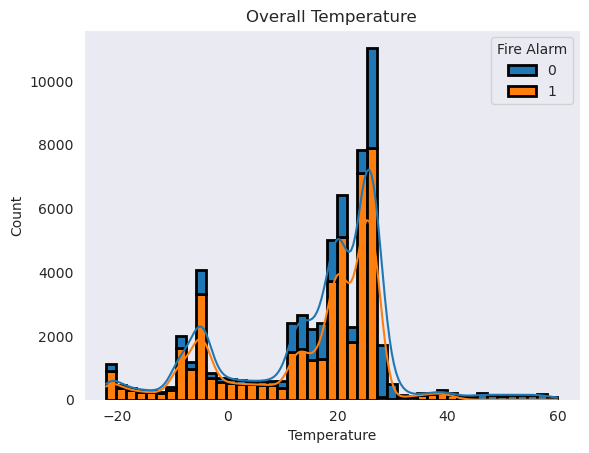

In [367]:
plt.title("Overall Temperature")
sns.histplot(data=df,x="Temperature",hue="Fire Alarm",hue_order=df["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",kde=True,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2);

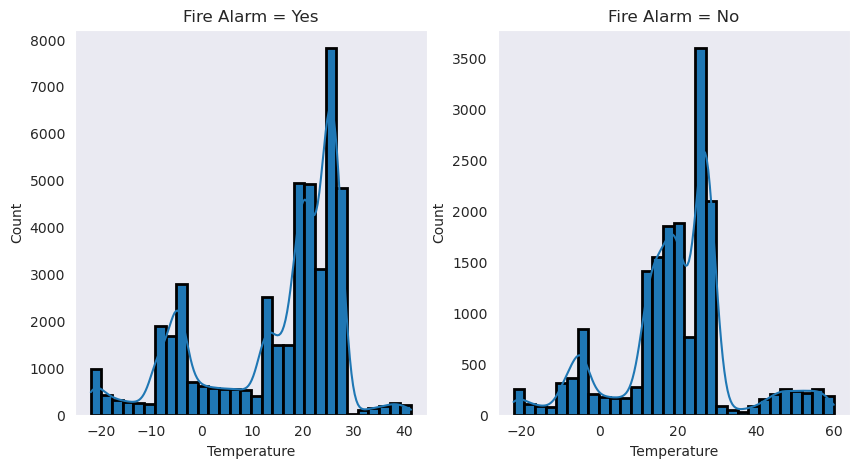

In [368]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

sns.histplot(data=df[df["Fire Alarm"]==1], x="Temperature", ax=axs[0], kde=True, bins=30, alpha=1, fill=True, edgecolor="black", linewidth=2)
axs[0].set_title("Fire Alarm = Yes")

sns.histplot(data=df[df["Fire Alarm"]==0], x="Temperature", ax=axs[1], kde=True, bins=30, alpha=1, fill=True, edgecolor="black", linewidth=2)
axs[1].set_title("Fire Alarm = No")

plt.show()

#### **Note**
----
- Most of the temperatures cause fire alarming fall in between 18°C to 28°C.
- While most of the temperature not causing fire Alarm is between 12°C to 28°C.

### <b>Humidity:</b>

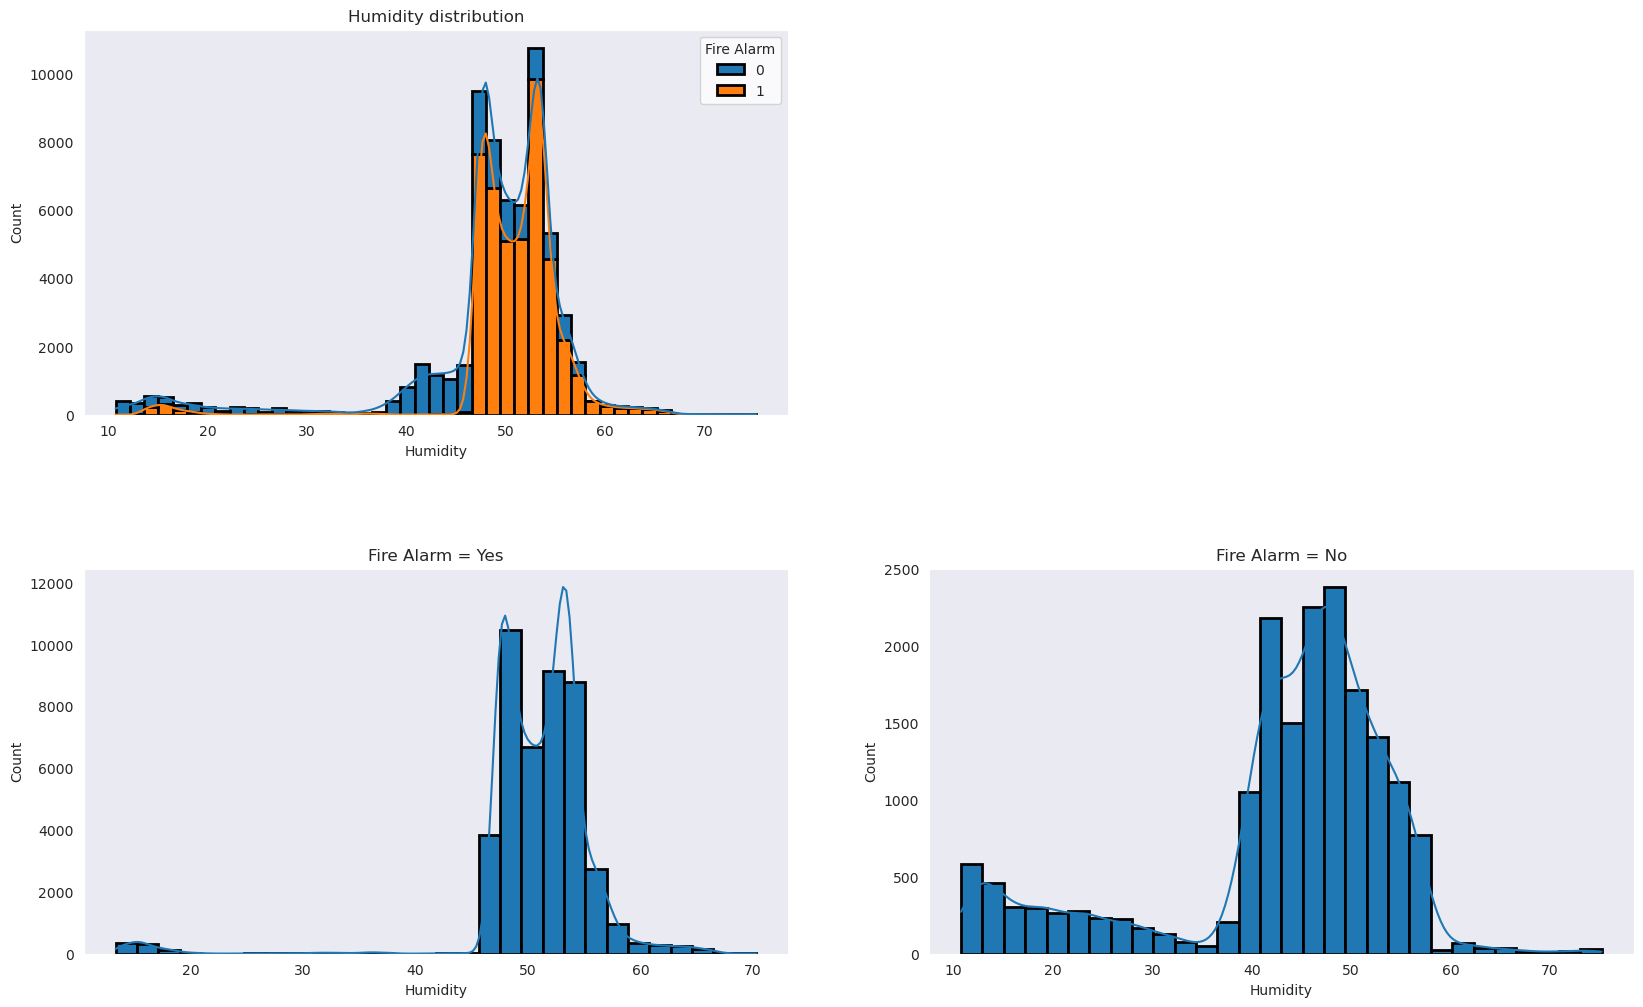

In [369]:
palette = sns.color_palette("husl", 3)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.2)
sns.set_style("whitegrid")

sns.histplot(data=df, x="Humidity", hue="Fire Alarm", hue_order=df["Fire Alarm"].value_counts(ascending=True).index, multiple="stack", ax=axs[0, 0], kde=True, bins=45, alpha=1, fill=True, edgecolor="black", linewidth=2)
axs[0, 0].set_title("Humidity distribution")
axs[0, 1].set_visible(False)

sns.histplot(data=df[df["Fire Alarm"]==1], x="Humidity", ax=axs[1, 0], kde=True, bins=30, alpha=1, fill=True, edgecolor="black", linewidth=2)
axs[1, 0].set_title("Fire Alarm = Yes")

sns.histplot(data=df[df["Fire Alarm"]==0], x="Humidity", ax=axs[1, 1], kde=True, bins=30, alpha=1, fill=True, edgecolor="black", linewidth=2)
axs[1, 1].set_title("Fire Alarm = No")

plt.show()


In [370]:
# Average humidity that does not cause fire alarm
mean_humidity_no_fire_alarm = df[df["Fire Alarm"]==0]["Humidity"].mean()
print("Average humidity that does not cause fire alarm: {:.2f}".format(mean_humidity_no_fire_alarm))

# Average humidity that causes fire alarm
mean_humidity_fire_alarm = df[df["Fire Alarm"]==1]["Humidity"].mean()
print("Average humidity that causes fire alarm: {:.2f}".format(mean_humidity_fire_alarm))

Average humidity that does not cause fire alarm: 42.93
Average humidity that causes fire alarm: 50.78


#### **Note**
----
- Most of the Humidity distribution is left skewed.
- Average humidity that does not cause fire alarm: 42.93°C.
- Average humidity that causes fire alarm: 50.78°C.

### <b>Total Volatile Organic Compounds</b>

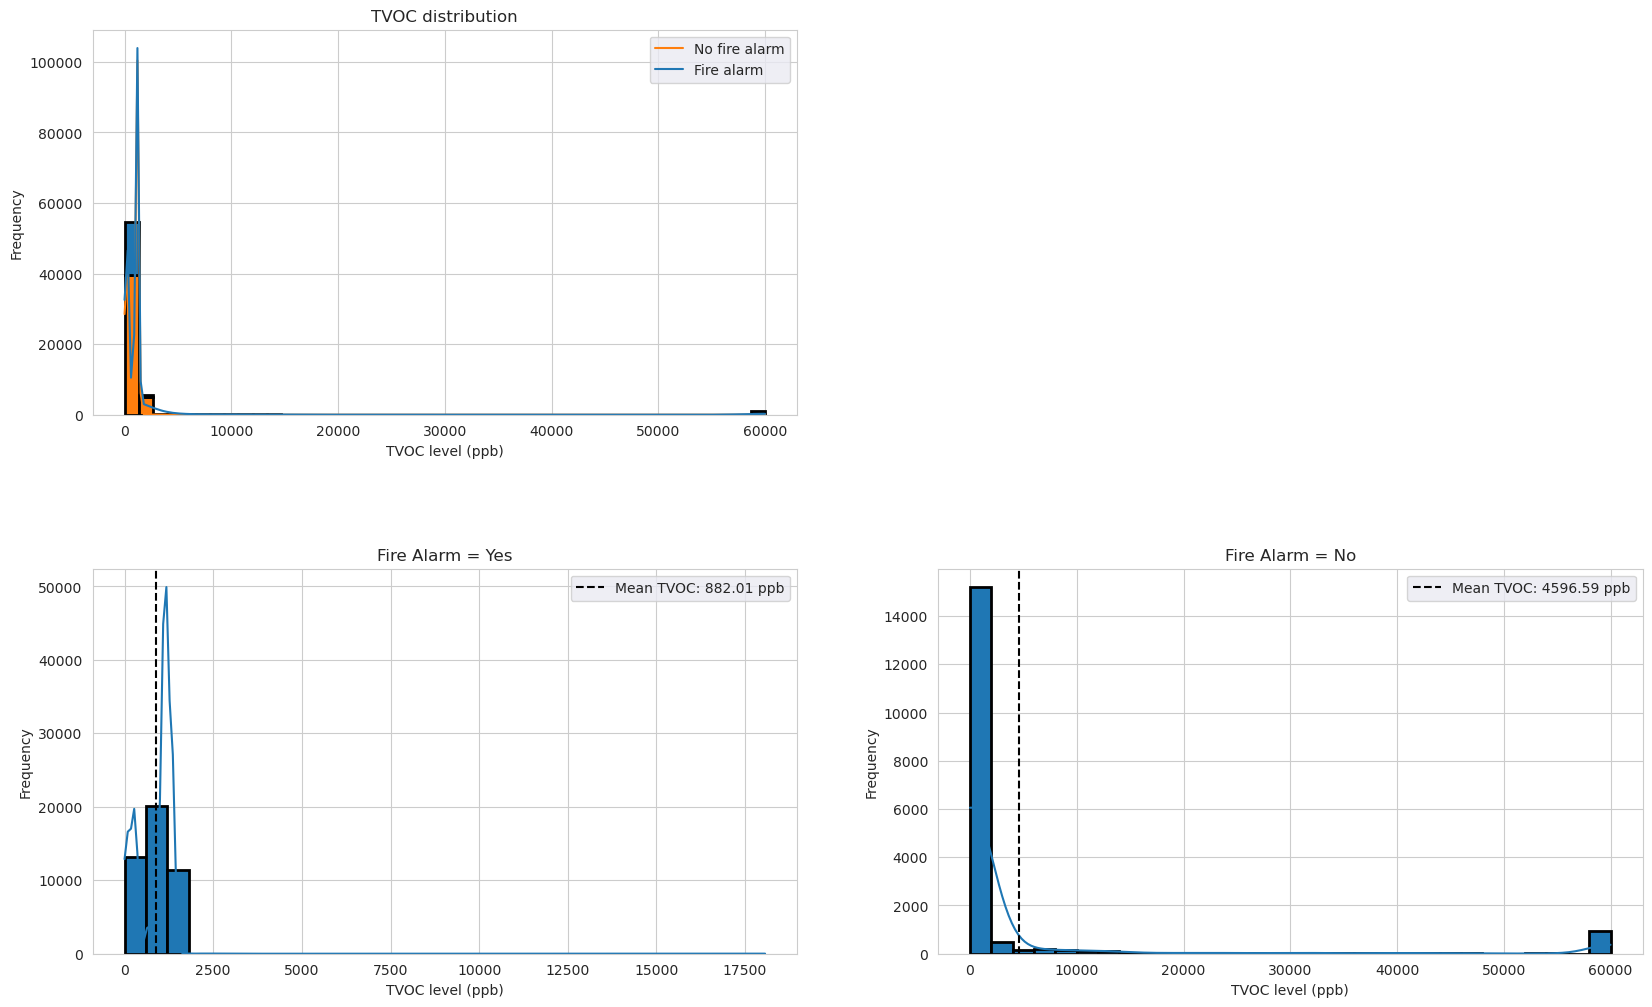

In [371]:
palette = sns.color_palette("husl", 2)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.2)
sns.set_style("dark")

sns.histplot(data=df, x="TVOC", hue="Fire Alarm", hue_order=df["Fire Alarm"].value_counts(ascending=True).index, multiple="stack", ax=axs[0, 0], kde=True, bins=45, alpha=1, fill=True, edgecolor="black", linewidth=2)
axs[0, 0].set_title("TVOC distribution")
axs[0, 1].set_visible(False)
axs[0, 0].set_xlabel("TVOC level (ppb)")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].legend(["No fire alarm", "Fire alarm"])

mean_tvoc_no_alarm = df[df["Fire Alarm"]==0]["TVOC"].mean()
mean_tvoc_alarm = df[df["Fire Alarm"]==1]["TVOC"].mean()

sns.histplot(data=df[df["Fire Alarm"]==1], x="TVOC", ax=axs[1, 0], kde=True, bins=30, alpha=1, fill=True, edgecolor="black", linewidth=2)
axs[1, 0].set_title("Fire Alarm = Yes")
axs[1, 0].set_xlabel("TVOC level (ppb)")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].axvline(mean_tvoc_alarm, color="black", linestyle="--", label=f"Mean TVOC: {mean_tvoc_alarm:.2f} ppb")
axs[1, 0].legend()

sns.histplot(data=df[df["Fire Alarm"]==0], x="TVOC", ax=axs[1, 1], kde=True, bins=30, alpha=1, fill=True, edgecolor="black", linewidth=2)
axs[1, 1].set_title("Fire Alarm = No")
axs[1, 1].set_xlabel("TVOC level (ppb)")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].axvline(mean_tvoc_no_alarm, color="black", linestyle="--", label=f"Mean TVOC: {mean_tvoc_no_alarm:.2f} ppb")
axs[1, 1].legend()

plt.show()


#### **Note**
----
- Most of the Humidity distribution is extremly left skewed.
- Average levels of TVOC that causes fire alarms= 882.01 ppb.
- Average levels of TVOC which does not cause any firm alarm = 4596.59 ppb.

### <b> CO2 Equivalent Concentration:</b>

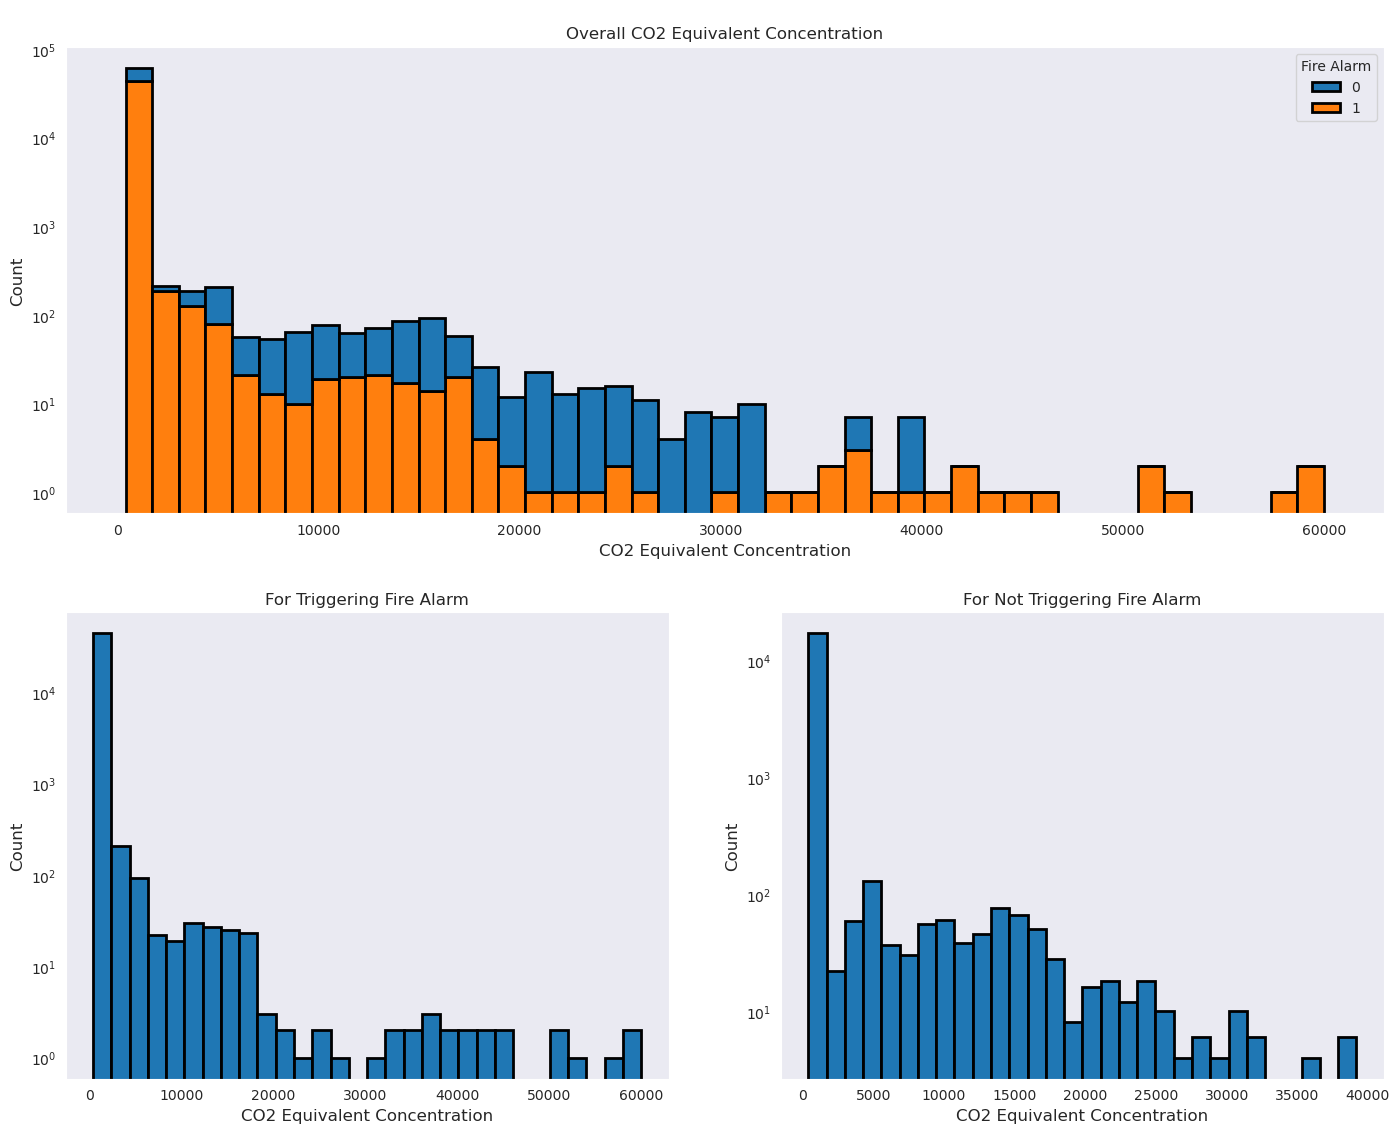

In [372]:
fig = plt.figure(figsize=(15, 12))
axs = fig.subplot_mosaic([["00", "00"],
                            ["10", "11"]], sharey=False)
plt.tight_layout(pad=5.0)

sns.histplot(data=df, x="eCO2", hue="Fire Alarm", hue_order=df["Fire Alarm"].value_counts(ascending=True).index, multiple="stack", ax=axs["00"], kde=False, bins=45, alpha=1, fill=True, edgecolor="black", linewidth=2)
axs["00"].set_title("\nOverall CO2 Equivalent Concentration", fontsize=12)
axs["00"].set_ylabel("Count", fontsize=12)
axs["00"].set_xlabel("CO2 Equivalent Concentration", fontsize=12)
axs["00"].set_yscale("log")

sns.histplot(data=df[df["Fire Alarm"]==1], x="eCO2", ax=axs["10"], kde=False, bins=30, alpha=1, fill=True, edgecolor="black", linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm", fontsize=12)
axs["10"].set_ylabel("Count", fontsize=12)
axs["10"].set_xlabel("CO2 Equivalent Concentration", fontsize=12)
axs["10"].set_yscale("log")

sns.histplot(data=df[df["Fire Alarm"]==0], x="eCO2", ax=axs["11"], kde=False, bins=30, alpha=1, fill=True, edgecolor="black", linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm", fontsize=12)
axs["11"].set_ylabel("Count", fontsize=12)
axs["11"].set_xlabel("CO2 Equivalent Concentration", fontsize=12)
axs["11"].set_yscale("log")

plt.show()

In [373]:
mean_CO2_no_fire_alarm = df[df["Fire Alarm"]==0]["eCO2"].mean()
print("Average CO2 concentration that does not cause fire alarm: {:.2f}".format(mean_CO2_no_fire_alarm))

mean_CO2_fire_alarm = df[df["Fire Alarm"]==1]["eCO2"].mean()
print("Average CO2 concentration that causes fire alarm: {:.2f}".format(mean_CO2_fire_alarm))

Average CO2 concentration that does not cause fire alarm: 962.59
Average CO2 concentration that causes fire alarm: 553.19


#### **Note**
----
- Most of the Humidity distribution is extremly left skewed.
- Average CO2 concentration that does not cause fire alarm: 962.59.
- Average CO2 concentration that causes fire alarm: 553.19.

### <b>Particulate Matter and their impact on Fire Alarm:</b>

In [374]:
grouped = df.groupby('Fire Alarm').agg({'PM1.0': ['mean', 'std'], 
                                          'PM2.5': ['mean', 'std'], 
                                          'NC0.5': ['mean', 'std'], 
                                          'NC1.0': ['mean', 'std'], 
                                          'NC2.5': ['mean', 'std']})
grouped

PM1.0                    PM2.5                     NC0.5  \
                  mean          std        mean          std         mean   
Fire Alarm                                                                  
0           261.982706  1439.725596  450.034639  2828.774776  1356.283816   
1            36.146406   590.458583   78.417842  1493.576072   146.111337   

                              NC1.0                    NC2.5               
                    std        mean          std        mean          std  
Fire Alarm                                                                 
0           7155.122661  493.872027  3150.390163  178.982259  1446.595793  
1           2144.942045   87.665549  1689.242658   40.541627   895.171419

#### **Note**
----
- We get to that during Fire Alarms being activated the amount of particulate matter is less compared to the amount when the fire alarms werent activated.

### <b>Frequency distribution of Fire Alarm by PM2.5 levels:</b>

In [375]:
pd.crosstab(index=df['Fire Alarm'], columns=pd.cut(df['PM2.5'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))

PM2.5,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
Fire Alarm,,,,,,,,,,
0,16704,39,53,19,10,13,3,8,9,12
1,44368,35,21,8,8,5,7,3,5,5


#### **Note**
----
- We can see that out of all the instances where there was no fire alarm triggered, 16,704 instances had PM2.5 concentrations in the range of 0-10
- As the amount of particulate matter levels increases we get to see a decrease in the level of fire alarms being caused.

### <b>Range of pressure levels alongside the concentration levels of RawH2 and Raw Ethanol:</b>

In [376]:
grouped = df.groupby(pd.cut(df['Pressure'], bins=100)).agg({'Raw H2': ['mean'], 
                                                               'Raw Ethanol': ['mean']}).sort_index(ascending=False).head(10)
grouped

,Raw H2,Raw Ethanol
,mean,mean
Pressure,,
"(939.771, 939.861]",12775.569512,19779.437805
"(939.681, 939.771]",13148.140235,20064.479857
"(939.591, 939.681]",13182.573758,20076.222140
"(939.501, 939.591]",13141.474383,20034.430740
"(939.411, 939.501]",13119.614159,19981.355752
"(939.32, 939.411]",13104.561972,19944.580282
"(939.23, 939.32]",13038.617152,19875.333844
"(939.14, 939.23]",12781.374539,19590.671587


### <b>Analysis of features with respect to date and time:</b>

In [377]:
df['Hour'] = pd.to_datetime(df['time'].astype(str)).dt.hour
fire_alarms_by_hour = df[df['Fire Alarm'] == 1].groupby('Hour').size()
fire_alarms_by_hour.sort_values(ascending=False)

Hour
12    3602
2     3600
3     3600
4     3600
5     3600
6     3600
9     3600
10    3600
11    3600
13    3600
1     3491
14    3137
23    1121
8      679
7      325
18       2
dtype: int64

#### **Note**
----
- Most number of fire alarms occur during 12 noon.
- Interestingly most alarms are activated during early morning hours

#### **The highest average pressure value for each minute of the day:**

In [378]:
df['Minute'] = pd.to_datetime(df['time']).dt.minute
pressure_by_minute = df.groupby(['Hour', 'Minute'])['Pressure'].mean()
pressure_by_minute.sort_values(ascending=False).head(10)

Hour  Minute
8     2         939.835917
      5         939.834817
0     18        939.833167
      16        939.831733
      15        939.831283
8     3         939.829033
      4         939.827133
0     17        939.826433
      19        939.825300
8     6         939.818883
Name: Pressure, dtype: float64

#### <b>Average Raw H2 and Raw Ethanol levels with Fire Alarms count by Hour:</b>

In [379]:
grouped1 = df.groupby('Hour').agg({'Raw H2': ['mean'], 'Raw Ethanol': ['mean'], 'Fire Alarm': ['sum']})
grouped1

,Raw H2,Raw Ethanol,Fire Alarm
,mean,mean,sum
Hour,,,
0,13022.145976,19949.256435,0
1,13211.277222,20113.553611,3491
2,13008.023056,19849.003333,3600
3,12817.462500,19466.141944,3600
4,12875.536667,19444.948333,3600
5,12928.893611,19430.884167,3600
6,12972.508889,19393.394444,3600
7,12794.824742,19486.938144,325


#### **Hourly average values of PM1.0, PM2.5, NC0.5, NC1.0, NC2.5, and Temperature**

In [380]:
grouped_hour = df.groupby('Hour').mean()[['PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'Temperature']]
grouped_hour

,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Temperature
Hour,,,,,,
0,0.572164,0.618306,3.881662,0.642599,0.036954,22.320940
1,1.884614,1.957989,12.970922,2.022668,0.045696,-3.988094
2,1.020975,1.060775,7.026861,1.095778,0.024748,-4.504414
3,2.094425,2.176058,14.415022,2.247838,0.050768,14.003174
4,1.828808,1.900108,12.587311,1.962831,0.044332,13.897088
5,1.769283,1.838136,12.177169,1.898894,0.042888,16.404848
6,1.911550,1.985944,13.156189,2.051543,0.046336,-13.155352
7,1.111856,1.264175,7.395584,1.323579,0.132677,12.093247
8,0.861461,0.897733,5.922608,0.927826,0.023471,17.639850


In [381]:
grouped_minute = df.groupby('Minute').mean()[['PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'Temperature']]
grouped_minute

,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Temperature
Minute,,,,,,
0,1.568931,1.633961,10.789225,1.688575,0.041782,14.516446
1,1.646422,1.711873,11.327735,1.768655,0.041301,14.338178
2,1.619784,1.684833,11.142647,1.740834,0.041264,14.143349
3,1.600402,1.663941,11.011931,1.719040,0.039957,13.952628
4,1.571275,1.633010,10.812882,1.686983,0.038589,13.772864
5,2.146386,2.230426,14.771858,2.304128,0.052428,13.391044
6,46.914719,48.742604,322.893927,50.351467,1.137229,12.922566
7,155.259250,161.342031,1068.502167,166.673295,3.796042,12.630522
8,439.295046,516.056739,2873.630144,542.811845,68.545773,12.439225


#### **Note**
----
- there is a sudden spike in PM1.0 and PM2.5 concentrations at minute 6, which then drops down to normal levels in the following minutes.
- There is a significant increase in the concentrations of all particle sizes (NC0.5, NC1.0, and NC2.5) as well as temperature around minute 17, which persists for several minutes.

### Data Pre-processing:

In [382]:
df.head()

,date,time,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,Hour,Minute
0,2022-06-09,1900-01-01 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0,8
1,2022-06-09,1900-01-01 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0,0,8
2,2022-06-09,1900-01-01 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0,0,8
3,2022-06-09,1900-01-01 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0,0,8
4,2022-06-09,1900-01-01 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0,0,8


In [383]:
df = df.drop(['time'],axis=1)
df.head()

,date,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,Hour,Minute
0,2022-06-09,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0,8
1,2022-06-09,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0,0,8
2,2022-06-09,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0,0,8
3,2022-06-09,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0,0,8
4,2022-06-09,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0,0,8


In [384]:
df['day'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

In [385]:
target = df['Fire Alarm']
df = df.drop(['Fire Alarm','date'],axis=1)
df['Fire_Alarm']=target

In [386]:
df.head()

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Hour,Minute,day,month,year,Fire_Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,8,9,6,2022,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0,8,9,6,2022,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0,8,9,6,2022,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0,8,9,6,2022,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0,8,9,6,2022,0


### **Correlation Matrix:**

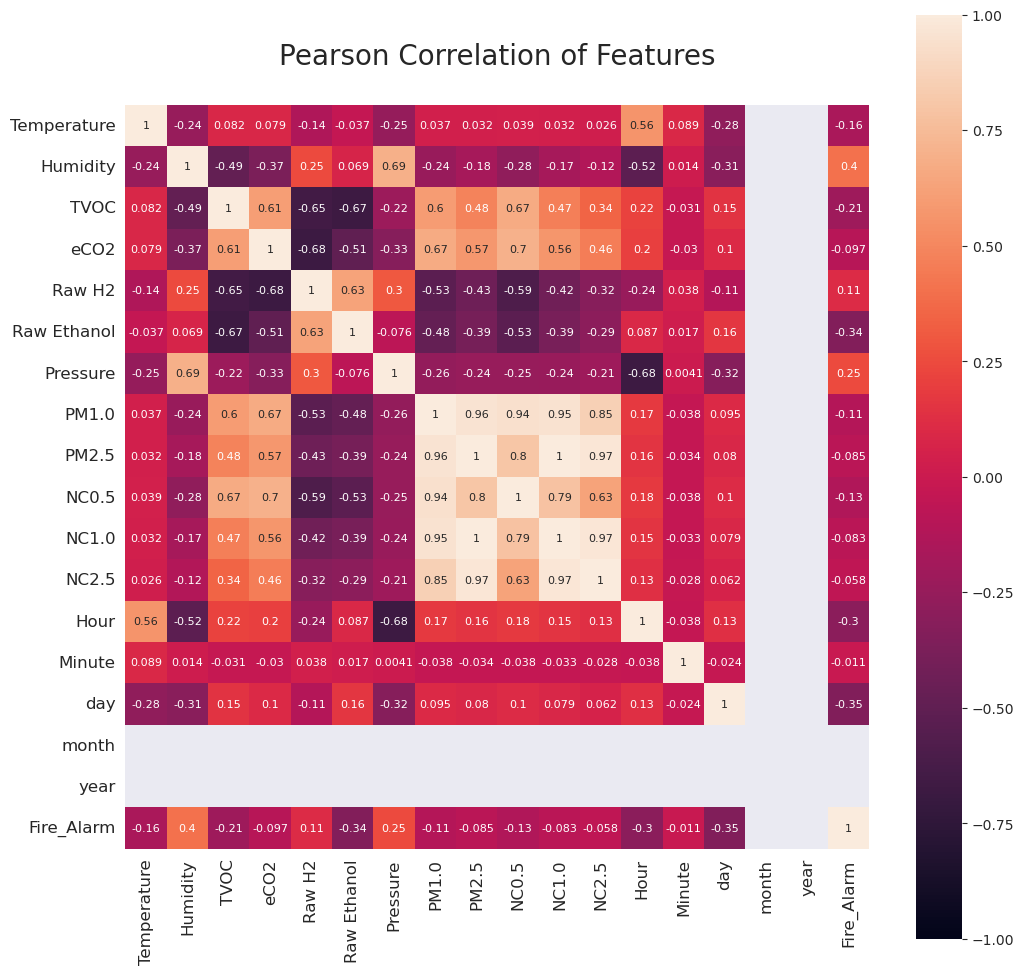

In [402]:
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), square=True, annot=True, vmin=-1, vmax=1, annot_kws={"fontsize": 8})
plt.title("Pearson Correlation of Features\n", fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

#### **Note**
----
- We can see that there is no significant correlation between the target feature and other features. However, there is a small positive correlation between the target feature and humidity and pressure, and a small negative correlation between the target feature and TVOC and Raw Ethanol.

### **Model:**

In [404]:
df.head()

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Hour,Minute,day,month,year,Fire_Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,8,9,6,2022,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0,8,9,6,2022,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0,8,9,6,2022,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0,8,9,6,2022,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0,8,9,6,2022,0


In [412]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score,recall_score,classification_report,accuracy_score

In [413]:
features = df.columns[:-1]
target = df.columns[-1]

In [431]:
from sklearn.metrics import classification_report

kf = KFold(n_splits=5, random_state=0, shuffle=True)
accuracies = []
predictions=[]
clfs = []

for i, (train_index, val_index) in enumerate(kf.split(df)):
    X_train, X_val = df[features].loc[train_index], df[features].loc[val_index]
    y_train, y_val = df[target][train_index], df[target][val_index]
    
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_val.values)
    predictions.append(preds)
    
    clfs.append(clf)
    accuracy = accuracy_score(y_val, preds)
    print(f'Accuracy for fold {i}: {accuracy}')
    accuracies.append(accuracy)


print(f'Mean accuracy across all folds: {np.mean(accuracies)}')

Accuracy for fold 0: 1.0
Accuracy for fold 1: 0.9999201660546064
Accuracy for fold 2: 0.9997604981638193
Accuracy for fold 3: 0.9997604981638193
Accuracy for fold 4: 0.9999201660546064
Mean accuracy across all folds: 0.9998722656873703


In [433]:
predictions_all = np.concatenate(predictions)
true_labels = df[target].values

# Generate classification report for all folds
report = classification_report(true_labels, predictions_all)
print(f'Classification report for all folds:\n{report}\n')

Classification report for all folds:
              precision    recall  f1-score   support

           0       0.24      0.24      0.24     17873
           1       0.70      0.70      0.70     44757

    accuracy                           0.57     62630
   macro avg       0.47      0.47      0.47     62630
weighted avg       0.57      0.57      0.57     62630




### **Conclusion:**
- Looking at the classification report for all folds, we can see that the classifier achieved a higher precision, recall, and F1-score for the positive class (label 1) than for the negative class (label 0).
- This suggests that the classifier is better at identifying instances of the positive class than the negative class.